# ArcGIS Online Organization Administration at Scale
## ESRI EdUC 2019
## Seth Peery, Sr. GIS Architect, Virginia Tech


In [1]:
# This simply sets up the environment for us to run the Jupyter Notebook as a presentation
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1440,
        'height': 900,
        'scroll': True,
})

{'width': 1440, 'height': 900, 'scroll': True}

# Link to this Presentation and Code

![qr](images/qr.png)
https://github.com/sspeery/educ2019



# Rationale for organization management
* Software as a Service products must be managed with the same attention we give on-premises systems
* Management objective is to lower impediments to use of ArcGIS Online
* AGOL depends on finite shared resources; org administration is the stewardship of these resources
 * named users
 * service credits
 * Pro and other licenses
 * usability and organization of the site
* AGOL orgs can become unwieldy at scale, and require different approaches
* User lifecycle stages require different management practices over time
* Processes, training and automation become increasingly important for large orgs


## A brief history of SaaS WebGIS Administration
* From a mindset of scarcity to abundance
* From a niche content service to the foundation of a WebGIS
* Scripting evolved to fill gaps in the API
* Constant evolution of the technology makes past administration best practice obsolete


## Scale Considerations
* DevOps metaphor: cattle v. pets
* An amorphous blob of users vs first name basis
* Use batch operations as often as possible
* Think in the aggregate
* Anticipate user life cycle events (especially important in university communities with transient populations!)
    * onboarding
    * ad hoc requests
    * deprovisioning


![events](images/adminflow.png)

# Org administration tasks
* Enterprise Logins
* Auto provisioning
* Initial default privileges and entitements
* Credit stewardship
* Pro Licenses
* Ad hoc requests
* Content migration
* Deprovisioning

## Enterprise Logins with automatic provisioning

Once your organization reaches a certain scale, sending invitations to new users is untenable.

We assume that most all entities with large AGOL organizations will have an Enterprise idP (Identity Provider) with which AGOL can federate for purposes of authentication.

Therefore, it's a best practice to use Enterprise Logins with the auto-provisioning model.  This is step # 1. 

At that point, the work is shifted from managing users on the front end (onboarding) to figuring out what to do with them after they show up. 

<img src="images/entlogins.png" alt="Enterprise Logins" style="width: 500px;"/>

## Setting Default User Privileges
After many years of complaining by the education community, ESRI has finally come out with an out of the box solution for auto-provisioning of many of the things we've had to use scripting for in the past: *New Member Defaults.*

This allows for automatic allocation of Software licenses, Credit Budgets, Groups, User Types, Roles, ESRI Access and  *dramatically* cuts down on onboarding overhead. *
<table><tr><td><img src="images/newmemberdefaults.png"  style="width: 600px;"/></td><td>
    
## New Member Defaults Philosophy
#### "Functionaly Unlimited" 
#### Give users maximum latitude 
##### but monitor the overall organization consumption of (decreasingly) finite resources
#### With credit budgeting it is OK to give the Publisher Role
#### Credits are not really a limiting factor any more 
##### (but licenses and named users might be)

 </td></tr></table>

* it also made a big chunk of this presentation obsolete and I had to redo it after the June Release.  Thanks, ESRI.


## The Geri Miller Guide to Geo-enabling Your Campus with New Member Defaults
1. Enable enterprise logins, commonly known as SSO – integrate with existing business systems and do not create arcgis-only accounts (unless when working with outside affiliates).
2. Enable "Automatically" join for enterprise logins (also known as auto-provisioning), so that new users are automatically granted access to ArcGIS.
3. Configure the "New Member Defaults" so that people have access to everything in ArcGIS they might need to do their job:
    1. Leave the default user type set to "Creator". (FYI, the default user type will soon become GIS Professional Advanced for those with institutional agreements.)
    2. Set the role to "Publisher" – empower everyone with the abilities to do the work they need to do
    3. Configure default Add-on Licenses (ArcGIS Pro, Insights, Business Analyst, Community Analyst, GeoPlanner, etc.)
    4. Set a Credit Quota (1000, 2000, 5000, etc.) whatever fits your institution -- enable your community to do their work, yet protect them from accidental mistakes
    5. Enable Esri Access for everyone – allow them to utilize Esri Academy (E-Learning/Esri Training), GeoNet, etc.
4. Encourage students, faculty, staff to leverage all free options for self-learning, such as Learn ArcGIS, Esri Academy, documentation, etc.



## Documentation
* The customization and automation necessary in large scale organizations become a critical part of your infrastructure!
* It can be challenging to remember what you did for non-recurring operations
* Jupyter Notebooks, like this presentation, can store documentation alongside executable code
    * These can be run locally or on a jupyter notebook server.  
    * [Here's how to set up a Jupyter Notebook Server](https://github.com/sspeery/educ2019/blob/master/jupyter_notebook_server.md)
* Revision control, like github, can be used for storing the authoritative versions of scripts (and sharing them!)
* Internal wikis are also a good documentation repository
* As we move towards Infrastructure as Code, artifacts that we create are more amenable to revision control. 

## User Interaction Events
* When operating at scale we need efficient mechanisms to communicate with our users
* It is very useful to maintain a listserv of AGOL users for sitewide notifications (and also is a decent proxy for your institution's GIS user base!)
* When users need to contact us, it gets unwieldy if they e-mail the admins directly.
* A good practice in this space is to create points of entry into a ticketing system for AGOL ad hoc events
* Even better if one can automate the fulfillment of the fickets using Python!]


<table><tr><td><img src="images/serCat.png"  /></td></tr></table>

## Communication
* Successful management of AGOL is a collaborative process with stakeholders.
* The out of the box functionality of an AGOL org is wrapped in a business process layer that will depend on your administration strategy.

_Users need to know how you operate your organizations._

Define standard operating procedures for 
* User onboarding
* Credit consumption and budgeting
* Default role privileges and escalation processes
* Process for deprovisioning
* Process to request more credits/privileges/ content transfer
* Identify a single point to request ad hoc operations or ask questions.
* User training via documentation, seminars, presentations



  
     
       
       


## Scripting
* The UI has evolved dramatically in terms of what you can do out of the box
* ... but has its limits when performing large batch operations
* When Scripting for ArcGIS Online organization administration, we mostly use the Python API
* But the Python API wraps the REST API, which, in some cases is the only way to do certain things

## The Python API for organization administration
The python API provides a set of objects for administering your Web GIS.
See 
![GIS Module](images/guide_gis_module_01.png)

## New User cron job

Even with New Member Defaults, depending on your admin strategy you may still want to do some things to new users when they auto provision in an organization.  This example demonstrates:
* Give all members all licenses
* Make sure everyone has ESRI access
* Add members to an e-mail list

### [New User Cron](https://jupyter2.aws.gis.cloud.vt.edu:8888/jupyter/notebooks/educ2019/Standalone_New_User_Cron.ipynb)


## Removing "Drive by Users"

### [Drive By Users Example](https://jupyter2.aws.gis.cloud.vt.edu:8888/jupyter/notebooks/educ2019/DriveByUserDeletion.ipynb)

## Topping off a user's credits on demand

### With AWS Lambda goodness and ticketing system integration

## Identifying users who are no longer affiliated


how you determine who is an affiliate is up to you
Some idPs (e.g., Active Directory) may return a negative authentication response once a user has been deactivated or removed.  Thus users are locked out automatically.
At the University of Michigan, identities don’t expire upon graduation, but the idP inserted code into their authentication backend that checks a username for the required affiliations, then returns a negative authN if authZ is negative.
VT’s idP returns positive authN regardless of authZ.  So we developed a microservice to check eligibility and ran that out of band
*It would be nice* if we could read extended attrs from the idP

but anyway you get a list of users who should not be in your org anymore
... then what?  This can't be fully automated. 

_The Official ESRI Position here is "don't do anything"_
* notify them
* move content to an archival account?
* export content elsewhere?


In [ ]:
from arcgis.gis import GIS
import requests
import time
import csv
import json
import pandas
from time import strftime
from urllib.parse import urlparse
import getpass

# Make the connection to VT ArcGIS Online
with open('vtActiveConfig.json') as configFile:
    myConfig = json.load(configFile)

# now connect
gis = GIS(myConfig['agolOrg']['url'],username=myConfig['agolOrg']['username'],password=myConfig['agolOrg']['password'])    
orgShortName = urlparse(orgURL).hostname[:-len('.maps.arcgis.com')]

# verify that it works
try:
    org = gis.properties.name
    print ("Connected to " + org)
except exception as ex:
        print ("Error retrieving AGOL org properties.")
userList = []
users = gis.users.search(max_users=200)

# Wrap the call to the REST service in a function
def isActiveVT(pid):
    result = False
    url = myConfig['authService']['url']
    params = {'authkey':myConfig['authService']['password'],'pid':pid}
    r = requests.post(url,data=params)
    if(r.text==myConfig['authService']['valueIfTrue']):
        result=True
    return result

for user in users:
    d_esriUsername = user.username
    d_fullName = user.fullName
    d_email = user.email
    d_pid = user.username.rsplit("_"+myConfig['agolOrg']['shortName'])[0]

    # Call the custom REST service 
    d_active = "false"
    # Here we are using 'requests' to query https://apps.itpals.vt.edu/AGOL/checkActive.pl 
    if(isActiveVT(d_pid)):                
        d_active = myConfig['authService']['valueIfTrue'] 
    
    currentUserInfo = {"pid":d_pid,
                        "esriUsername":d_esriUsername,
                        "fullName":d_fullName,
                        "email":d_email,
                        "active":d_active}
    userList.append(currentUserInfo)
    
# iteration done.
# now let's make a dataframe. 
df = pandas.DataFrame(userList)
nonAffiliates = df.loc[(df['active'] == 'false') ]
print(str(len(nonAffiliates)) + " users are no longer VT Affiliates.")
nonAffiliates

## REST API example

The ArcGIS Python API gis module handles a majority of the things you might need to do with your organization at scale. 
But there are exceptions.  
Thankfully, since the REST API underlies the Python API _and_ the admin GUI, if it can be done at all, it can be done with REST and the requests module.

## [REST API example: Custom Role IDs](https://jupyter2.aws.gis.cloud.vt.edu:8888/jupyter/notebooks/educ2019/REST_API_Custom_Role_Ids.ipynb)

## Reverse Engineering the ArcGIS Online Admin GUI

There are times we want to do something that seems like it should be possible in the GUI, but is not straightforward to do it in Python.  
* Use Chrome Developer Tools to inspect the http traffic to the Portal's REST API
* Use PostMan to craft our own requests to mimic what the GUI is doing 
* Use the requests module to make the request from Python
<table><tr><td><img src="images/ChromeDevTools.png" alt="devtools" style="width: 500px;"/></td><td><img src="images/postman.png" alt="postman" style="width: 500px;"/></td>

## Content Migration and Deprovisioning
<table><tr><td>
    <ul>
        <li> Know when a user should be deprovisioned</li>
        <li> Important for license compliance </li>
        <li> Important for site security </li>
        <li> “Could” be automatic with Enterprise Login model …. depending on idP </li>
        <li> What to do with the content if there is any <li>
        <li> User copies it somewhere else (self service operation)</li>
        <li> An active user inherits it *(admin must do this) </li>
        <li>Archive it</li>
        <li> Delete it </li>
        <li> Have clear communication of timelines and then delete account </li></ul>
    </td><td>
<img src="images/agoassist.png"/>
    <a href ="https://ago-assistant.esri.com/">https://ago-assistant.esri.com/</a>
    </td></tr></table>

## Finding who is using the most storage

* Storage does not count against user credit quotas, but it is a persistent, permament credit sink for an organization.
* With "functionally unlimited" storage we may not need to care about this, but we need to be aware of it. 
* This example takes a long time to run. 
* We find and plot the top 20 storage users in the org.
![](images/storage.png)

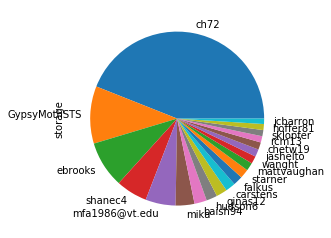

In [19]:
from matplotlib import pyplot as plt
userList = []
users = gis.users.search(max_users=9999)

for user in users:
    #These things come straight from the user dict
    d_esriUsername = user.username
    d_fullName = user.fullName
    d_email = user.email
    d_role = user.role
    d_storage = (user.storageUsage / 1024)
    
    #number of content items <=100 is returned by length of items arr
    d_items = len(user.items())
    #print(d_items)
    
    #VT PID is returned by stripping off the _virginiatech
    d_pid = user.username.rsplit("_"+myConfig['agolOrg']['shortName'])[0]
    
    #last access comes from https://developers.arcgis.com/python/guide/accessing-and-managing-users/
    t_last_accessed = time.localtime(user.lastLogin/1000)
    d_lastAccess = "{}/{}/{}".format(t_last_accessed[0], t_last_accessed[1], t_last_accessed[2])
    
    #count of groups this user is a member of
    d_groupCount = len(user.groups)
    
    #Now build a data structure    
    currentUserInfo = {"pid":d_pid,
                        "esriUsername":d_esriUsername,
                        "fullName":d_fullName,
                        "email":d_email,
                        "storage":d_storage,
                        "role":d_role,
                        "lastAccess":d_lastAccess,
                        "groups":d_groupCount,
                        "items":d_items}
    userList.append(currentUserInfo)
    
# iteration done.
# now let's make a dataframe.  We'll use this later.
df = pandas.DataFrame(userList)
top20 = df.sort_values(by='storage', ascending=False).head(20)
top20.plot (y='storage',labels=top20['pid'],kind='pie', legend=False)
plt.show()

# Options for running Python API code in production
* Interactively 
 * Jupyter noteboook
 * Your preferred Python IDE
 * Command line
* Event driven
 * AWS Lambda
* Recurring
 * AWS Lambda
 * cron job/ scheduled task

![lambda](images/lambda.png)

This presentation was built in Jupyter Notebooks using the RISE notebook extension.

I'm running it from a [Jupyter Notebook Server.](https://github.com/sspeery/educ2019/blob/master/jupyter_notebook_server.md)
![Architecture](images/jupyterarch.png)

# Presenter Contact Information
>*Seth Peery*  
>    Senior GIS Architect  
>    Enterprise GIS (0214)  
>        1700 Pratt Drive  
>        Blacksburg, VA 24061  
>    (540) 231-2178  
>    sspeery@vt.edu   
>    http://gis.vt.edu
![qr](images/qr.png)
GitHub Repository for this presentation and related examples:  https://github.com/sspeery/educ2019